# Is the new algorithm better?

We compare two algorithms to find the largest site of our system. The first one is the naive algorithm where we scan the whole system to find the minimum. The other one is the heapsort algorithm where we store our system in a tree-like structure that keep the minimum of the system at the root of the tree. 

In [1]:
from pathlib import Path
import os
from mainfct import mainfct
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut'

datapath=f"{brutpath}/HeapInsertion/He"
"""data1=f"{datapath}11/AvalancheB_output.txt"
data2=f"{datapath}21/AvalancheB_output.txt"
L=256
aval1=np.loadtxt(data1)
aval2=np.loadtxt(data2)

diff=0
for i in range(len(aval1)):
    if (aval1[i][0] != aval2[i][0] or aval1[i][1] != aval2[i][1] or aval1[i][2] != aval2[i][2]):
        diff=1



if (diff==1):
    print("Des différences de tailles d'avalanches sont visibles\n")
else:
    print("Aucune différence\n")"""


'data1=f"{datapath}11/AvalancheB_output.txt"\ndata2=f"{datapath}21/AvalancheB_output.txt"\nL=256\naval1=np.loadtxt(data1)\naval2=np.loadtxt(data2)\n\ndiff=0\nfor i in range(len(aval1)):\n    if (aval1[i][0] != aval2[i][0] or aval1[i][1] != aval2[i][1] or aval1[i][2] != aval2[i][2]):\n        diff=1\n\n\n\nif (diff==1):\n    print("Des différences de tailles d\'avalanches sont visibles\n")\nelse:\n    print("Aucune différence\n")'

## OFC Classique 

Para used: 
#### Physical parameters
256,316,512,1000        :lattice size\
0.0 , 0.012, 0.12     : dissipation \
1e+07       :maximum number of avalanches

#### Initial condition
Threshold fixed and constant at 1

#### Initial values
Random values beetween 0 and 1



#### Numerical parameters
3   # randseed      : numero of seed for random number generator



In [2]:
indicies = np.array([21,81,41,121,91,
                     251,261,271,341,281,
                     252,262,272,341,282,
                     
                     11,71,31,111,101,
                     291,301,311,321,331,
                     292,302,312,322,332])



L = [256, 316, 512, 700,1000]
nu = [0.0,0.012, 0.12]
nava= [ 1e4, 1e5, 1e6, 1e7]
code = [6, 8]

loaddata = np.empty((len(code),len(nu),len(L), len(nava), 2))

l = 0
for i in range(len(code)):
    for j in range(len(nu)):
        for k in range(len(L)):
        
            try:
            # Try loading with 3 lines
                loaddata[i][j][k] = np.loadtxt(f"{datapath}{indicies[l]}/time_outputB.txt")
            except ValueError:
            # If an exception occurs (e.g., not enough values to unpack), load with 2 lines
                load = np.loadtxt(f"{datapath}{indicies[l]}/time_outputB.txt")
                for m in range(len(nava)):
                    for n in range (2):
                        if (m < len(load)):
                            loaddata[i][j][k][m][n] = load[m][n]
                        else:
                            loaddata[i][j][k][m][n] = -1
            l += 1 
            
#print(np.shape(loaddata))


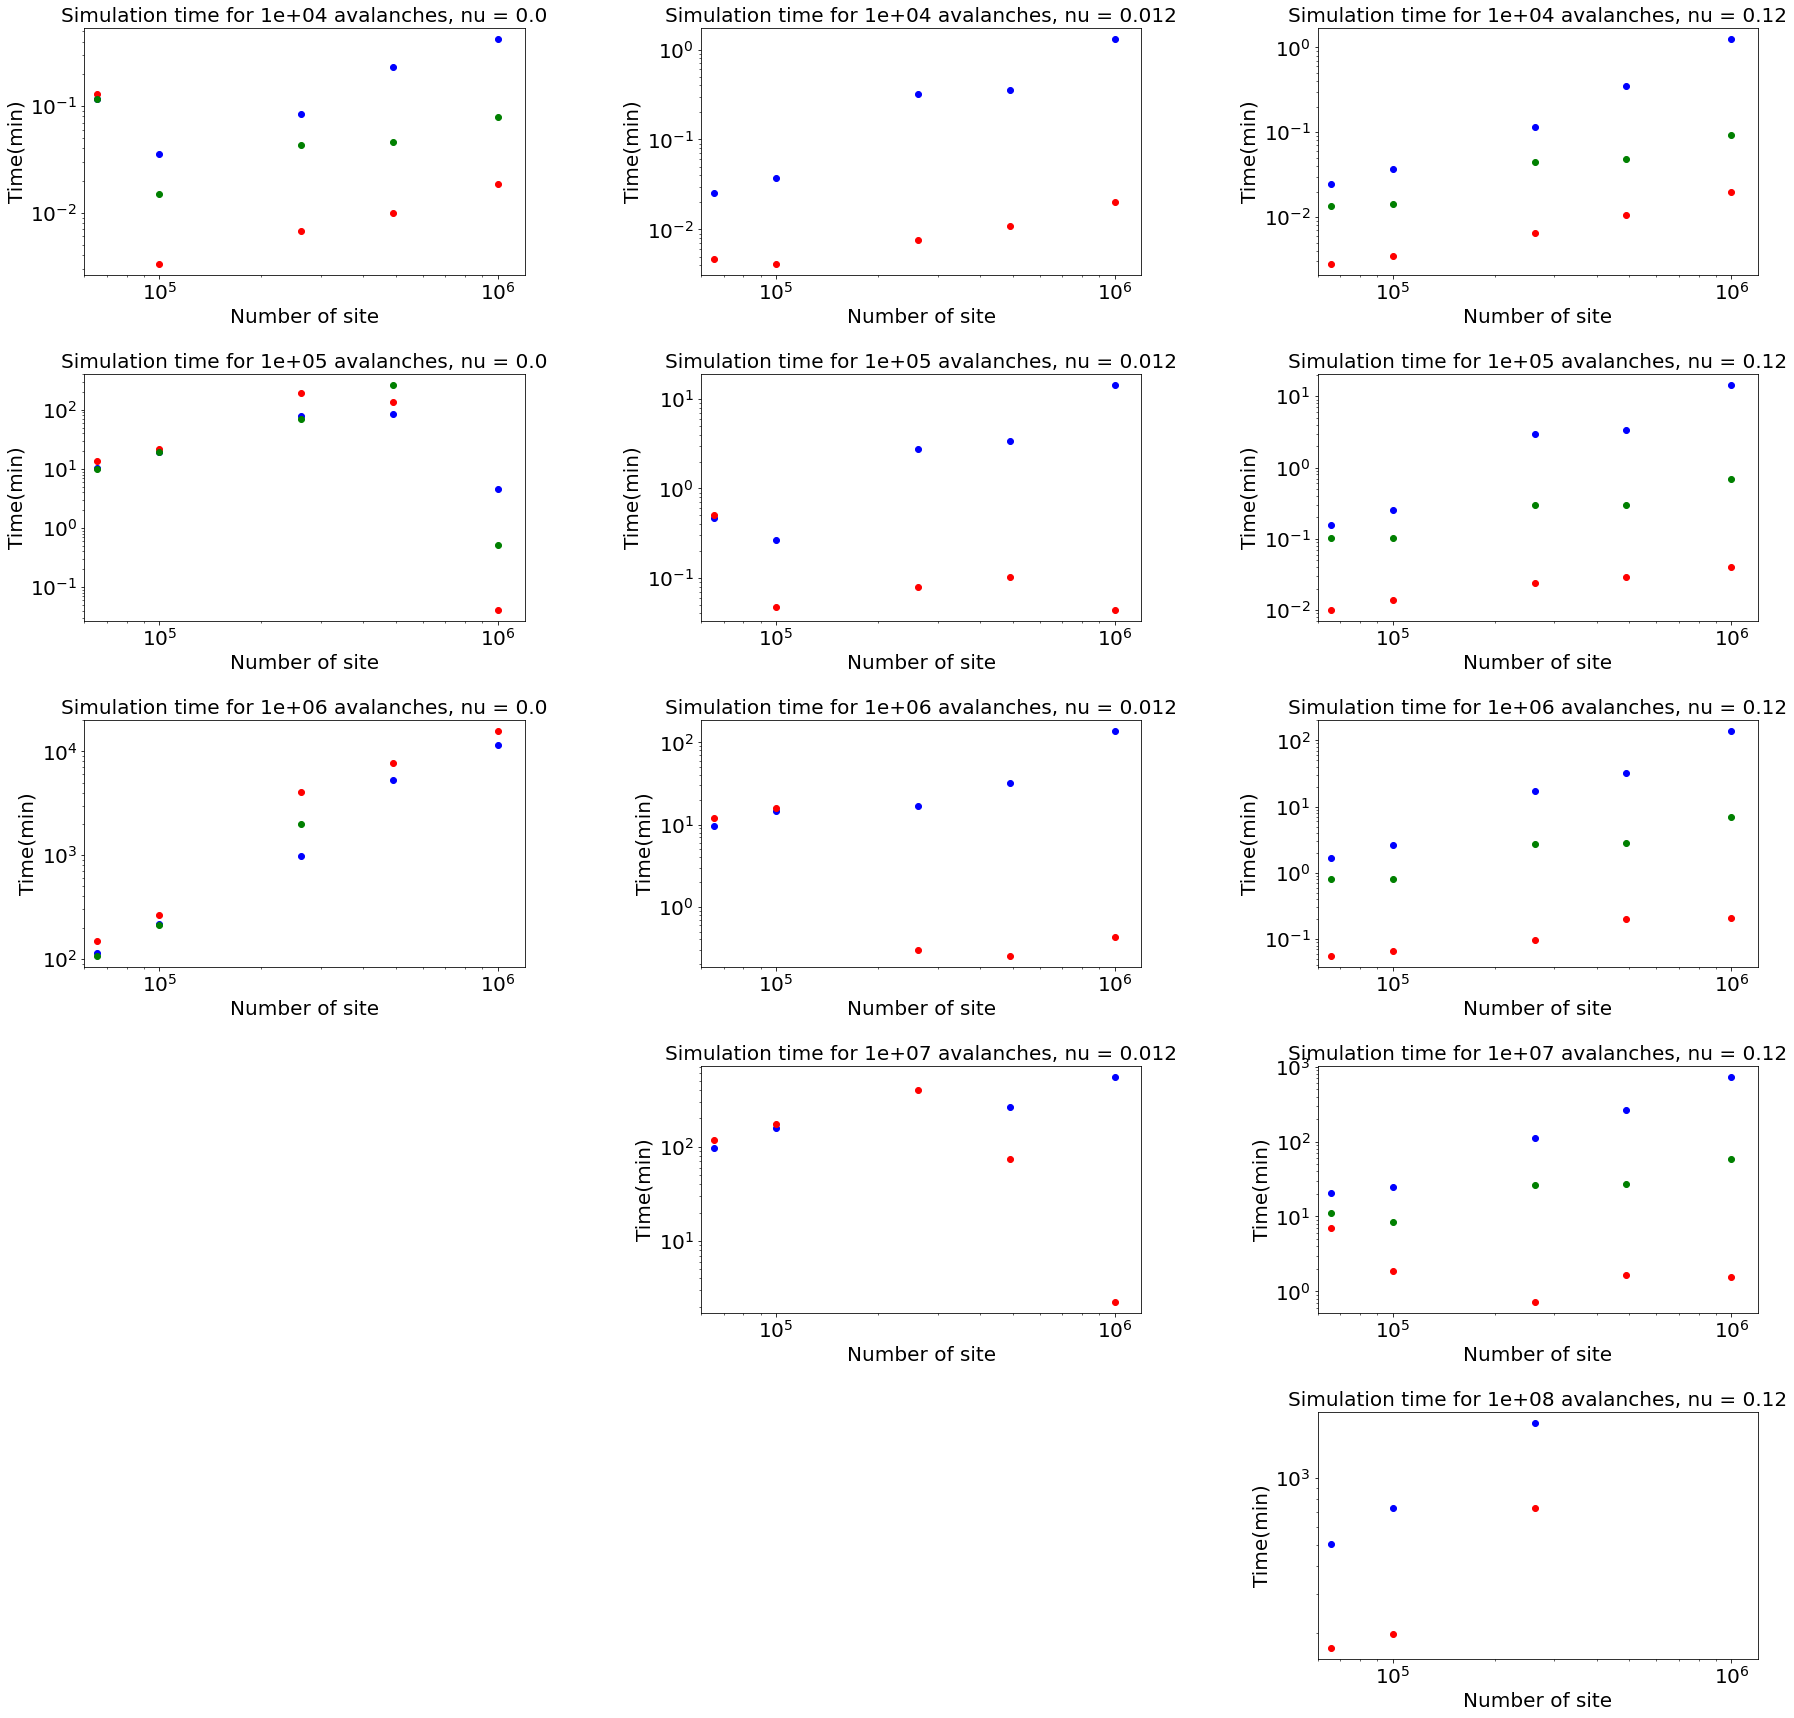

In [3]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

L = np.array([256, 316, 512, 700,1000])
N=L*L 
nu = np.array([0.0,0.012, 0.12])
nava= np.array([ 1e4, 1e5, 1e6, 1e7])
code = np.array([6, 8])

c = 0

for j in range(len(nava)):
    for i in range(len(nu)):
        c += 1
        if ( c == 10):
            continue
        plt.subplot(5, 3, c)
        
        for k in range(len(code)):
            col = "red"
            if (k == 0):
                col = "blue"
            for l in range(len(L)):
                    if(loaddata[k, i, l, j, 1] != -1):
                        plt.scatter(N[l], loaddata[k, i, l, j, 1]/60, color = col)
        plt.title(f"Simulation time for {format(nava[j], '.0e')} avalanches, nu = {nu[i]}", fontsize=20)
        plt.xlabel("Number of site", fontsize=20)
        plt.ylabel("Time(min)", fontsize=20)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlim(6e4,1.2e6)
        plt.xticks(size=20)
        plt.yticks(size=20)


#Données pour 1e8 ava#
plt.subplot(5, 3, 15)
plt.subplots_adjust(hspace=0.4)
indices8 = np.array([471,472,473,
             461,462,463])

L8 = np.array([256, 316, 512])  
N8=L8*L8  
nava= np.array([1e5, 1e6, 1e7, 1e8])

loaddatav6= np.zeros((len(L8), len(nava), 2))
loaddatav9= np.zeros((len(L8), len(nava), 2))

for i in range(len(indices8)):
    if (i <3):
        try:
        # Try loading with 3 lines
            loaddatav6[i] = np.loadtxt(f"{datapath}{indices8[i]}/time_outputB.txt")
        except ValueError:
        # If an exception occurs (e.g., not enough values to unpack), load with 2 lines
            load = np.loadtxt(f"{datapath}{indicies[l]}/time_outputB.txt")
            for m in range(len(nava)):
                for n in range (2):
                    if (m < len(load)):
                        loaddatav6[i][m][n] = load[m][n]
                    else:
                        loaddatav6[i][m][n] = -1
    else :
        n=0
        f = open(f"{datapath}{indices8[i]}/time_outputB.txt")
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split()
                if int(col[0]) in nava:
                    loaddatav9[i-3][n][0] = nava[n]
                    loaddatav9[i-3][n][1] = col[1] 
                    n += 1


for i in range (len(L8)):
    if(loaddatav6[i, 3, 1] != -1):
        plt.scatter(N8[i], loaddatav6[i, 3, 1]/60, color = "b")
    if(loaddatav9[i, 3, 1] != -1):
        plt.scatter(N8[i], loaddatav9[i, 3, 1]/60, color = "r")

plt.title(f"Simulation time for {format(nava[3], '.0e')} avalanches, nu = 0.12", fontsize=20)
plt.xlabel("Number of site", fontsize=20)
plt.ylabel("Time(min)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(6e4,1.2e6)
plt.xticks(size=20)
plt.yticks(size=20)



#ajout des données avec une taille de boite ne variant que d'un côté
indices3 = np.array([531,532,533,534,535,
                     521,522,523,524,525])
            
L3 = np.array([256, 316, 512, 700, 1000])
nava3 = np.array([1e4, 1e5, 1e6, 1e7])
nu3 = np.array([0.0,0.12])
loaddata3 = np.zeros((len(nu),len(L),len(nava3),2))


for i, term in enumerate(indices3):
    if i < len(indices3)/2:
        j = 0
        f = open(f"{datapath}{term}/time_outputB.txt" ) 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split('  ')
                if int(col[0]) in nava3:
                    loaddata3[1, i, j, 0] = col[0]
                    loaddata3[1, i, j, 1] = col[1]
                    j += 1
    else:
        j = 0
        f = open(f"{datapath}{term}/time_outputB.txt" ) 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split('  ')
                if int(col[0]) in nava3:
                    loaddata3[0, i-5, j, 0] = col[0]
                    loaddata3[0, i-5, j, 1] = col[1]
                    j += 1

#print(loaddata3[0])

for i in range(len(nava3)):    
    plt.subplot(5, 3, (i+1)*3)
    for j in range(len(L3)):
        plt.scatter(L3[j]**2,loaddata3[1,j,i,1]/60, color = "g")
    
    if(i<3):
        plt.subplot(5, 3, 1+3*i)
        for j in range(len(L3)):
            plt.scatter(L3[j]**2,loaddata3[0,j,i,1]/60, color = "g")
    



En bleu la méthode naive, en rouge la methode heap avec une box carré, en vert la methode heap avec une box rectangulaire.
La methode naive est légèrement plus rapide dans le cas conservatif mais quand on ajoute de la dissipation c'est la methode heap qui est meilleur.
Concernant la boite rectangulaire les operations pour permettre de la rendre rectangulaire semble faire perdre plus de temps que de parcourir une boite carré.

##### Il y a t-il une différence visible dans la structure du system pour que dans le cas à nu = 0.12 et L = 256 la différence de temps à 1e7 soit plus faible que 1e8?

In [4]:
import re

nbfile=1 #nb of different data
alpha=[22]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[100]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
datafile=f"{brutpath}/HeapInsertion/He47"
L=256

def coorno(n):
    x1=n%L
    x2=n//L
    return (x1, x2)


foldername=np.array([1])
time=np.array([1e5,1e6,1e7,1e8])

snapshot=np.zeros((len(foldername),len(time) , L*L))


regex = re.compile(r'z=([\d.]+), th=([\d.]+)')

for file, term in enumerate(foldername):
    for x, t in enumerate (time):
        f=open(f"{datafile}{term}/nav{int(t)}_outputB.txt")
        for i,ligne in enumerate(f):
            match = regex.search(ligne)
            if match:
                # Ajouter les nombres à la liste
                snapshot[file][x][i] = float(match.group(1))

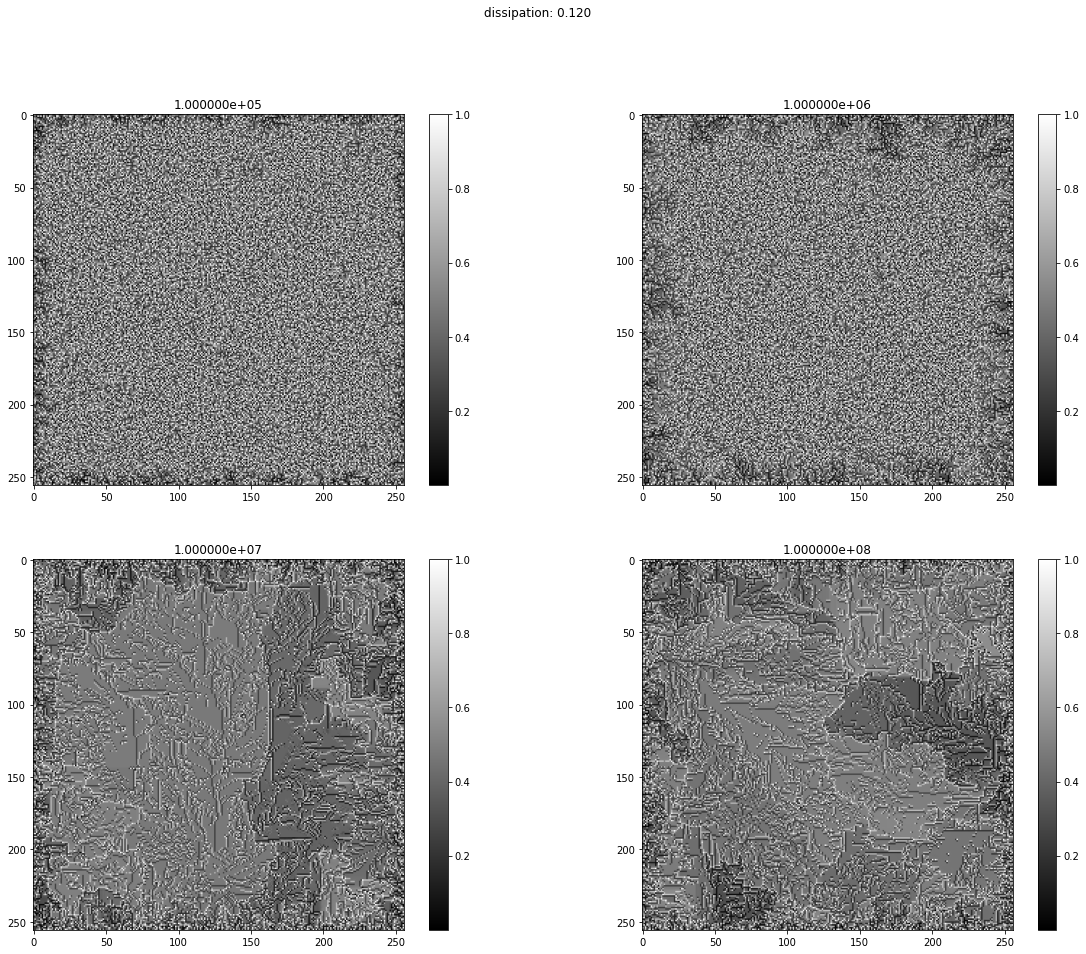

In [5]:
sys=np.zeros(len(foldername)*len(time)*L*L)
sys=np.reshape(sys, (len(foldername),len(time),L,L))


for i in range(len(foldername)):
    for j in range(len(time)):
        for n in range (L*L):
            x1, x2=coorno(n)
            sys[i][j][x1][x2]=snapshot[i][j][n]
            """if(i == 2 and j == 2 and x1>49 and x1<100 and x2 == 49):
                print(n)"""



        
def figure(tab3D,L,j):
    
    plt.figure(figsize=(20,15))        
    nbfig=len(tab3D)

    for i in range(nbfig):
        plt.subplot(int(nbfig/2),int(nbfig/2),i+1)
        #subsys=tab3D[i][50:100,50:100]
        #plt.imshow(subsys, cmap="gray")
        plt.imshow(tab3D[i], cmap="gray")
        plt.title(f"{time[i]:e}")
        plt.colorbar()
    plt.suptitle(f"dissipation: {1-4*(alpha[j]/ncifras[j]):.3f}")

for i in range (len(foldername)):

    figure(sys[i], L, i)

Rien n'est clairement visible

In the conservative case, it seems that the heapsort method is slower than the naive method when we go for longer avalanches. This can be explain in the code by the need to maintain the correspondance between the system and the heap. And physically by the fact that wih a low number of avalanches we are still in the transition regime andso we have smaller avalanches. This also explain why with dissipation the heap method is better than the naive one. The transition phase being longer with a higher dissipation. It seems that at high dissipation even when we reach the stationnary state the heap method is faster than the naive method.

## OFC Random threshold

Para used: 
#### Physical parameters
256,316,512, 700,1000        :lattice size\
0.0 , 0.012, 0.12     : dissipation \
1e+07       :maximum number of avalanches

#### Initial condition
Threshold fixed and constant at a random value between O.9 and 1.1

#### Initial values
Initialized at 0


#### Numerical parameters
3   # randseed      : numero of seed for random number generator


In [6]:
indicies = np.array([215,351,361,371,381,
                     214,352,362,372,382,
                     212,353,363,373,383,
                     
                     391,401,411,421,431,
                     392,402,412,422,432,
                     393,403,413,423,433])


datapath2=f"{brutpath}/Comparaison/Co"
L = [256, 316, 512, 700,1000]
nu = [0.0,0.012, 0.12]
nava= [ 1e4, 1e5, 1e6, 1e7]
code = [6, 8]

loaddata = np.empty((len(code),len(nu),len(L), len(nava), 2))

# l = 0
for i in range(len(code)):
    for j in range(len(nu)):
        for k in range(len(L)):
            try:
            # Try loading with 3 lines
                if (l == 0 or l == 5 or l == 10):
                     loaddata[i][j][k] = np.loadtxt(f"{datapath2}{indicies[l]}/time_outputB.txt")
                else:
                    loaddata[i][j][k] = np.loadtxt(f"{datapath}{indicies[l]}/time_outputB.txt")
            except ValueError:
                if (l == 0 or l == 5 or l == 10):
                    load = np.loadtxt(f"{datapath2}{indicies[l]}/time_outputB.txt")    
                else :
                    load = np.loadtxt(f"{datapath}{indicies[l]}/time_outputB.txt")
                for m in range(len(nava)):
                    for n in range (2):
                        if (m < len(load)):
                            loaddata[i][j][k][m][n] = load[m][n]
                        else:
                            loaddata[i][j][k][m][n] = -1
            l += 1 
            
#print(np.shape(loaddata))

IndexError: index 30 is out of bounds for axis 0 with size 30

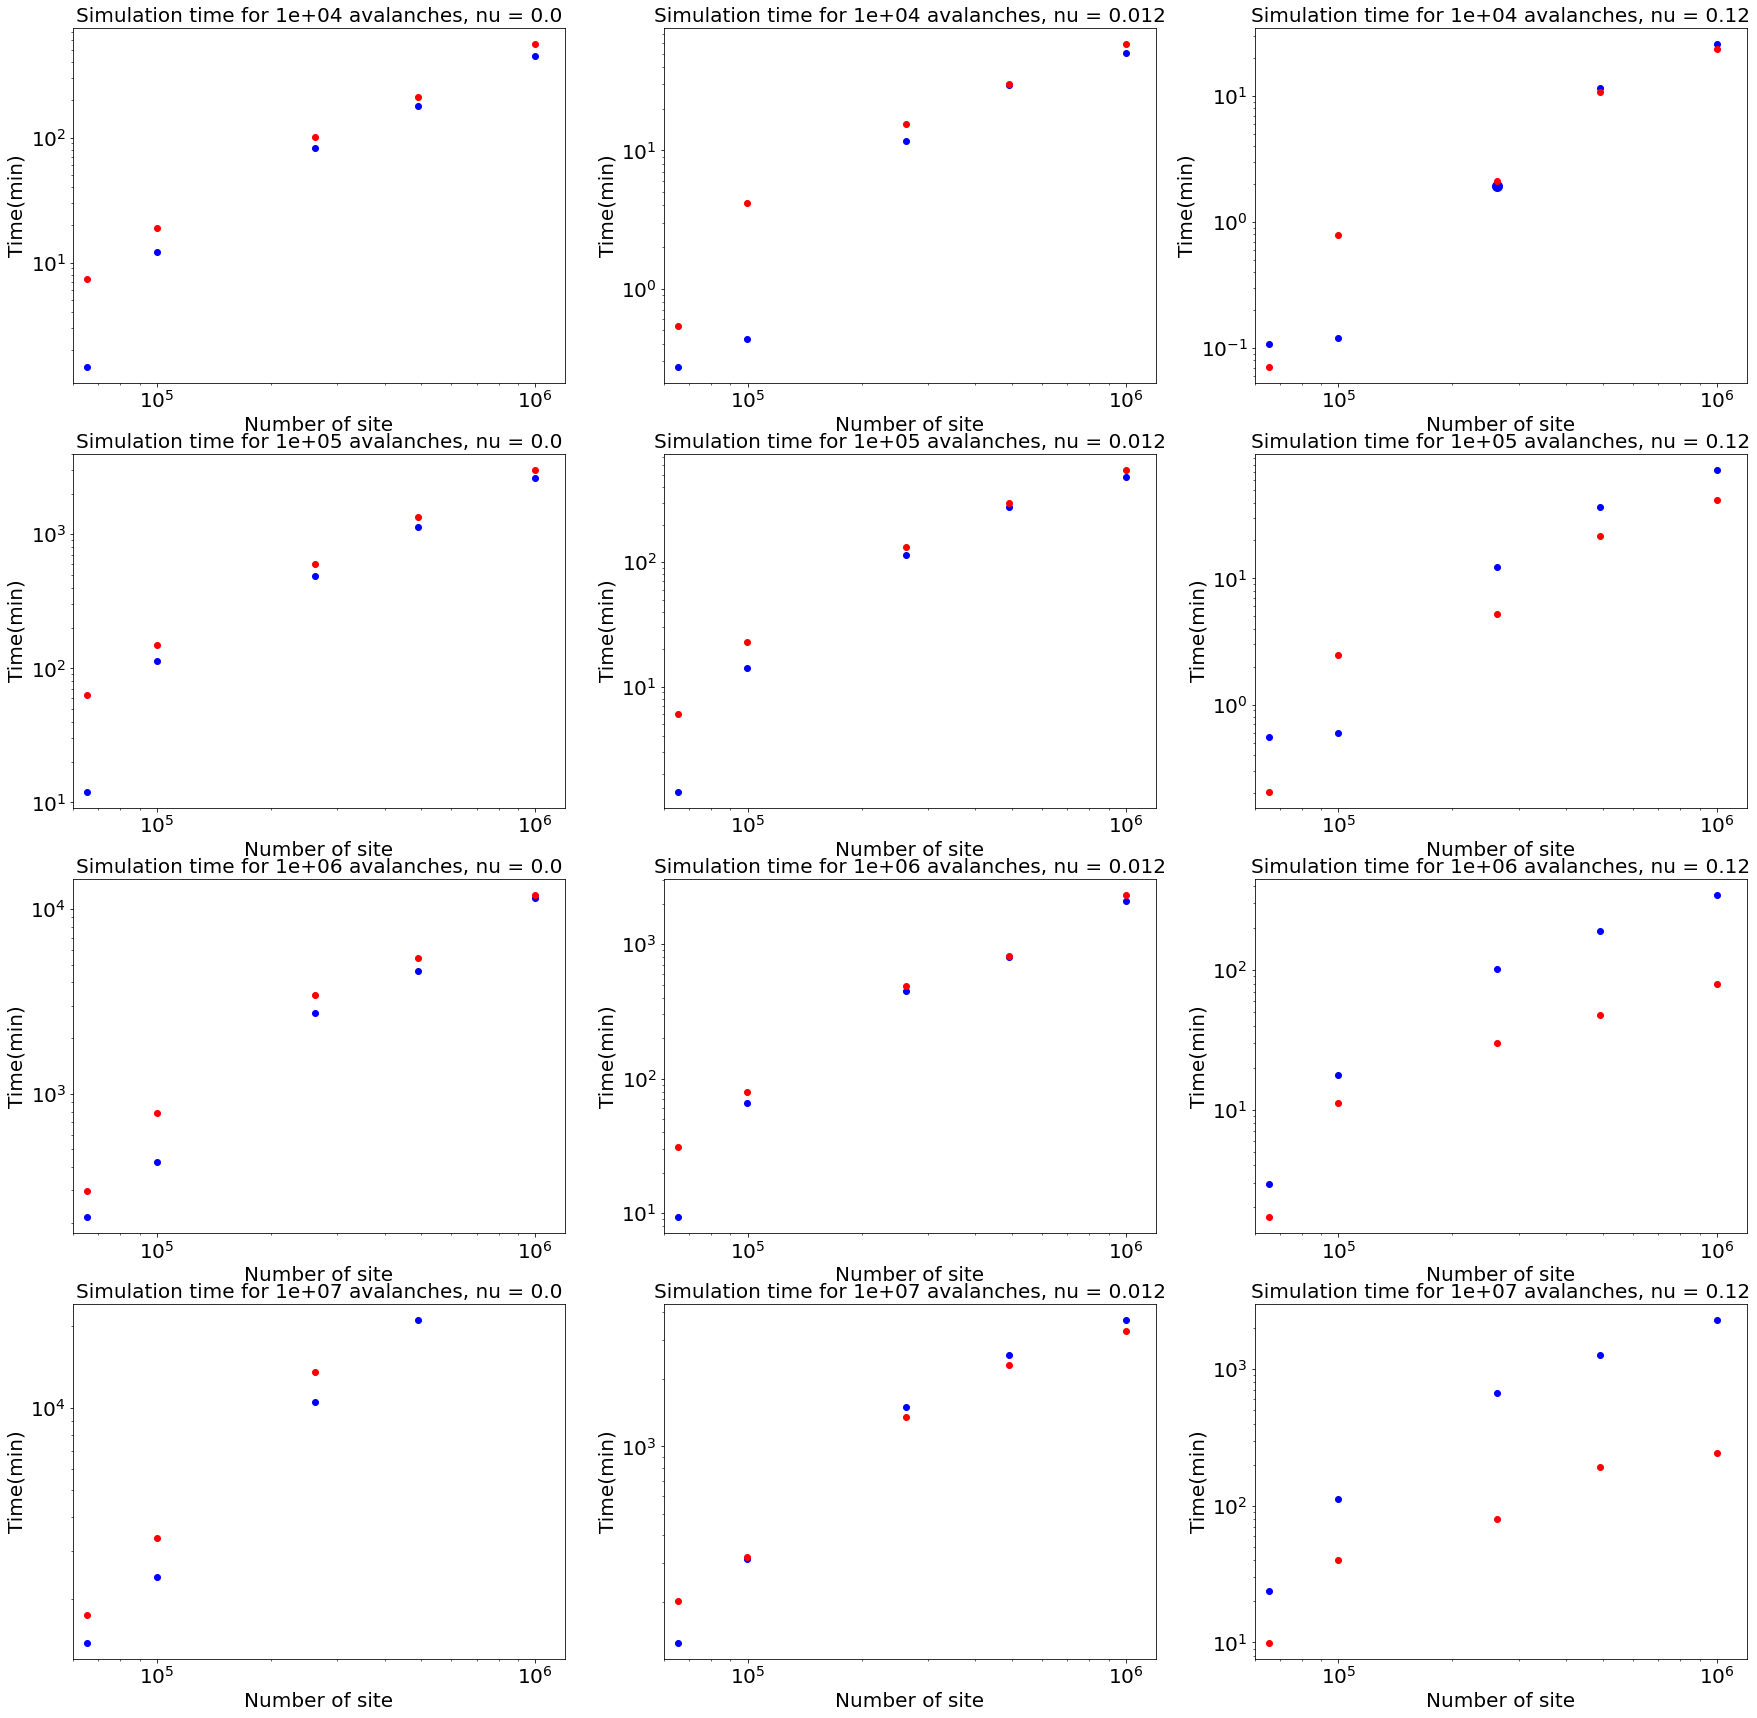

In [ ]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

c = 1

for j in range(len(nava)):
    for i in range(len(nu)):
        plt.subplot(4, 3, c)
        c += 1
        #if ( c == 11):
        #    continue
        for k in range(len(code)):
            col = "red"
            if (k == 0):
                col = "blue"
            for l in range(len(L)):
                    if(loaddata[k, i, l, j, 1] != -1):
                        if(k == 0 and i == 2 and l == 2 and j == 0 ):
                            plt.scatter(L[l]*L[l], loaddata[k, i, l, j, 1]/60, color = col, s=100)
                        else :
                            plt.scatter(L[l]*L[l], loaddata[k, i, l, j, 1]/60, color = col)
        plt.title(f"Simulation time for {format(nava[j], '.0e')} avalanches, nu = {nu[i]}", fontsize=20)
        plt.xlabel("Number of site", fontsize=20)
        plt.ylabel("Time(min)", fontsize=20)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlim(6e4,1.2e6)
        plt.xticks(size=20)
        plt.yticks(size=20)





In the case of OFC with random threshold a different behavior is visible. We can see that the naive and th heap method has a computational cost close for a majority of points but the heap method become better with high dissipation. 

## Evolution of the simulation time in classic OFC

Parameters:
L = 512\
nu = 0.012

In [ ]:
folderpath=f"{brutpath}/HeapInsertion/He441"

L = 512
nu = 0.012

loaddata= np.loadtxt(f"{folderpath}/time_outputB.txt", comments="#")



(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(0, -1000.0, '−1000'),
  Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000'),
  Text(0, 7000.0, '7000')])

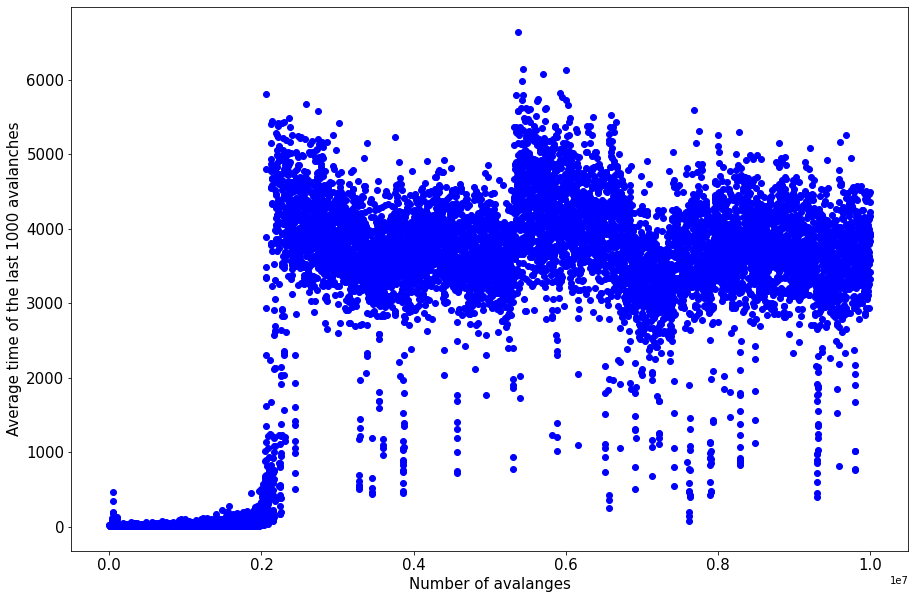

In [ ]:

plt.figure(figsize=(15,10))

#plt.scatter(loaddata[::20,0], loaddata[::20,2]/60, color = "b")
plt.scatter(loaddata[:,0], loaddata[:,2], color = "b")
plt.xlabel("Number of avalanges", size = 15)
plt.ylabel("Average time of the last 1000 avalanches", size = 15)
plt.xticks(size=15)
plt.yticks(size=15)


On voit clairement qu'il y a un saut de temps de simulation autour de 2e6 avalanches. (I forgot here to put the time renormalisation factor in the code so there is no unit ont the y axis)
Qu'est ce qu'il se passe à ce moment?

In [ ]:
nbfile=1 #nb of different data
alpha=[247]*nbfile #dissipation for each datafile
nalpha=len(alpha)
ncifras=[1000]*nbfile #to put in fraction
dim=[2]*nalpha  # Dimension of the sys for each datafile 
datafile=f"{brutpath}/HeapInsertion/He45"
L=512

def coorno(n):
    x1=n%L
    x2=n//L
    return (x1, x2)


foldername=np.array([1])
time=np.array([1.8e6,2e6,2.3e6,2.5e6])

snapshot=np.zeros((len(foldername),len(time) , L*L))

z = 0 
zth = 0

file=0
for term in foldername:
    x=0
    for t in time:
        f=open(f"{datafile}{term}/nav{int(t)}_outputB.txt")
        j=0
        for line in f :
            if not line.startswith('#'):
                nombres = line.strip().split(', ')
                snapshot[file][x][j]=nombres[0]
                j+=1
        x+=1
    file+=1

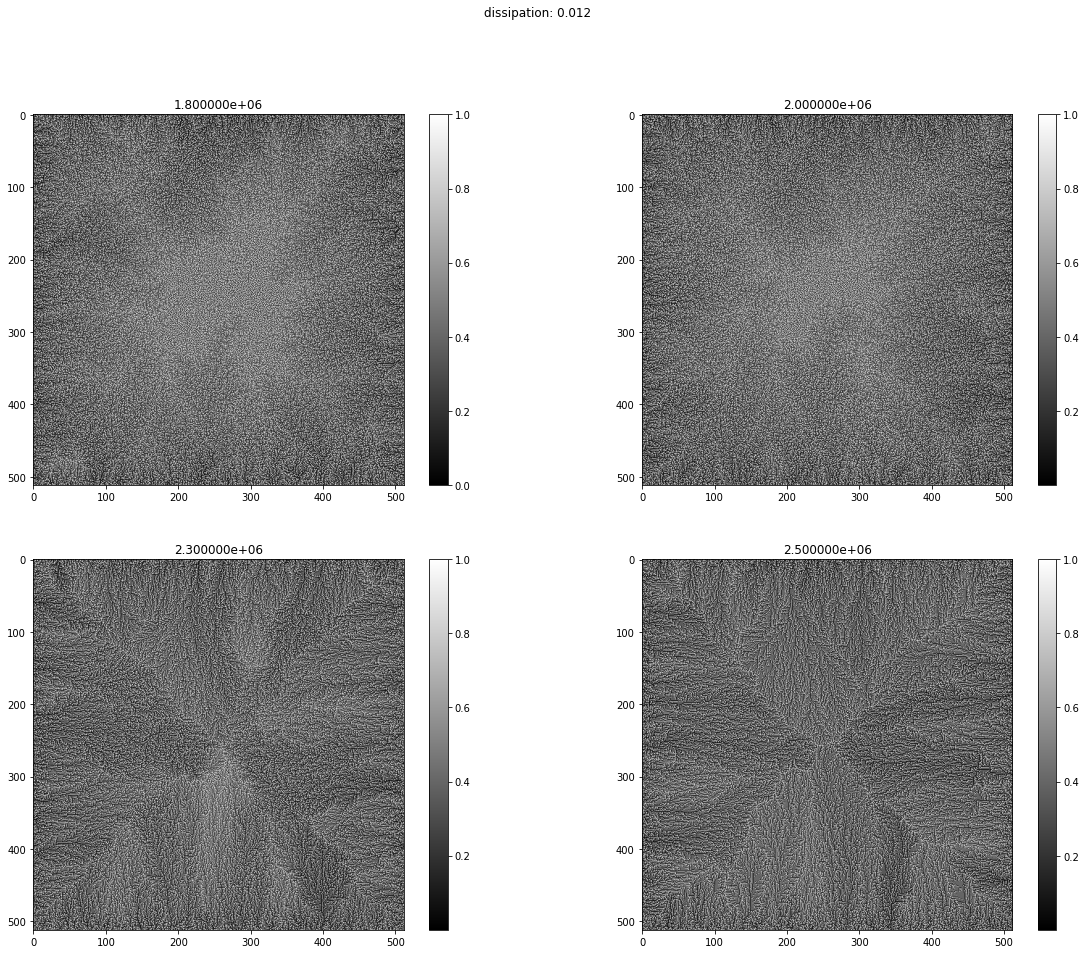

In [ ]:
sys=np.zeros(len(foldername)*len(time)*L*L)
sys=np.reshape(sys, (len(foldername),len(time),L,L))


for i in range(len(foldername)):
    for j in range(len(time)):
        for n in range (L*L):
            x1, x2=coorno(n)
            sys[i][j][x1][x2]=snapshot[i][j][n]

        
def figure(tab3D,L,j):
    
    plt.figure(figsize=(20,15))        
    nbfig=len(tab3D)

    for i in range(nbfig):
        plt.subplot(int(nbfig/2),int(nbfig/2),i+1)
        plt.imshow(tab3D[i], cmap="gray")
        plt.title(f"{time[i]:e}")
        plt.colorbar()
    plt.suptitle(f"dissipation: {1-4*(alpha[j]/ncifras[j]):.3f}")

for i in range (len(foldername)):
    figure(sys[i], L, i)
    


Le temps de simulation d'una avalanche semble grandement augmenter quand les patchs on atteint le centre du system

## Conclusion:
The naive method is faster in the conservative case since avalanches are bigger so it take more time to rearrange the heap.
The heap method is much faster when there is dissipation. The higger the dissipation, the faster is the heap method compared to the naive method.
The conclusion is similar for OFC classic and OFC RT


For the heap comparison between the heap method with square box and rectangular box, it seems to be slower to do the rectangular box. 
Note: The two simulations were made at different times and I've added multiple things to my code so this can slow down the code. I need to redo the simulation with a square box to be sure because the time difference is less than 1 minutes with nu = 0.12


In some case smaller system are slower to simulate than bigger system as in the 2nd row, first column plot. This can be explained by the fact that smaller systems reach the stationnary state faster. This can be confirmed by the two last figures that show that when the patches reach the center of the system the simulation average simulation time increase significantly.

#### Verification des temps de simulation pour la method de boite rectangulaire et carré

In [1]:
from pathlib import Path
import os
from mainfct import mainfct
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut'

datapath=f"{brutpath}/HeapInsertion/He"
testpath=f"{brutpath}/HeapInsertion/Te"

In [2]:
#ajout des données avec une taille de boite ne variant que d'un côté
indices = np.array([531,532,533,534,535,
                     301,302,303,304,305])
            
L = np.array([256, 316, 512, 700, 1000])
nava = np.array([1e4, 1e5, 1e6, 1e7])
nu = 0.12
loaddata = np.zeros((len(L),len(nava),2))
loaddata2 = np.zeros((len(L),len(nava),2))


for i, term in enumerate(indices):
    if i < (len(indices)/2):
        j = 0
        f = open(f"{datapath}{term}/time_outputB.txt" ) 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split('  ')
                if int(col[0]) in nava:
                    loaddata[i, j, 0] = col[0]
                    loaddata[i, j, 1] = col[1]
                    j += 1
    else:
        j = 0
        k=i-int(len(indices)/2)
        f = open(f"{testpath}{term}/time_outputB.txt" ) 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split('  ')
                if int(col[0]) in nava:
                    loaddata2[k, j, 0] = col[0]
                    loaddata2[k, j, 1] = col[1]
                    j += 1
                    
                    
### ETAT CONSERVATIF
indices2 = np.array([521,522,523,                     
                     311,312,313])
            
L2 = np.array([256, 316, 512, 700, 1000])
nava2 = np.array([1e4, 1e5, 1e6])
nu2 = 0.00
loaddata21 = np.zeros((len(L2),len(nava2),2))
loaddata22 = np.zeros((len(L2),len(nava2),2))


for i, term in enumerate(indices2):
    if i < len(indices2)/2:
        j = 0
        f = open(f"{datapath}{term}/time_outputB.txt" ) 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split('  ')
                if int(col[0]) in nava2:
                    loaddata21[i, j, 0] = col[0]
                    loaddata21[i, j, 1] = col[1]
                    j += 1
    else:
        j = 0
        k = i-int(len(indices2)/2)
        f = open(f"{testpath}{term}/time_outputB.txt" ) 
        for line in f :
            if not line.startswith('#'):
                col = line.strip().split('  ')
                if int(col[0]) in nava:
                    loaddata22[k, j, 0] = col[0]
                    loaddata22[k, j, 1] = col[1]
                    j += 1
                    

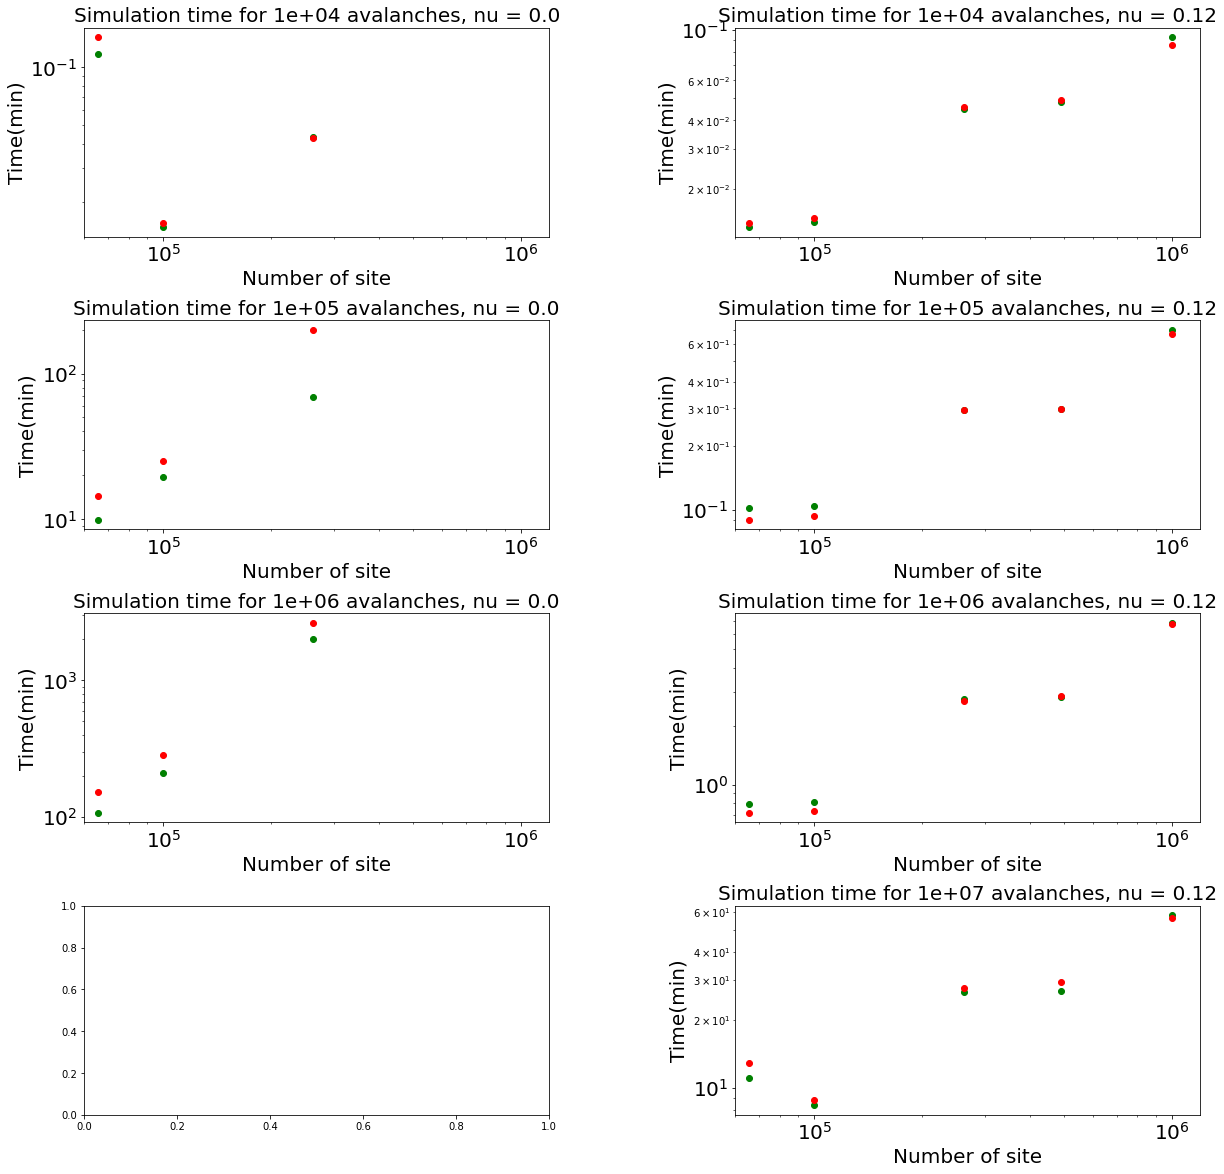

In [3]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)


c = 0
for i in range(1,(len(nava)*2)+1,2):  
    plt.subplot(4, 2, i)  
    if i < 6 :
        for j in range(len(L2)):
                plt.scatter(L2[j]**2,loaddata21[j,c,1]/60, color = "g")
                plt.scatter(L2[j]**2,loaddata22[j,c,1]/60, color = "r")
        plt.title(f"Simulation time for {format(nava2[c], '.0e')} avalanches, nu = {nu2}", fontsize=20)
        plt.xlabel("Number of site", fontsize=20)
        plt.ylabel("Time(min)", fontsize=20)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlim(6e4,1.2e6)
        plt.xticks(size=20)
        plt.yticks(size=20)
        
    plt.subplot(4, 2, i+1)
    for j in range(len(L)):
        plt.scatter(L[j]**2,loaddata[j,c,1]/60, color = "g")
        plt.scatter(L[j]**2,loaddata2[j,c,1]/60, color = "r")
    plt.title(f"Simulation time for {format(nava[c], '.0e')} avalanches, nu = {nu}", fontsize=20) 
    c += 1  
    plt.xlabel("Number of site", fontsize=20)
    plt.ylabel("Time(min)", fontsize=20)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(6e4,1.2e6)
    plt.xticks(size=20)
    plt.yticks(size=20)

In red the square box algorithm, in green the rectangular box algorithm

## Conclusion:

Eventually, after verification of the simulation time for square and rectangular box method, the rectangular box method is faster in the conservative case and equivalent at high dissipation